### Simple Linear Regression

#### Tasks: We are to predict the percentage marks of a student, how much they will score based on the number of hours they have studied!

In [1]:
#import some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("sucess!")

sucess!


### Let's Import our data!

In [2]:
url = "http://bit.ly/w-data"
scoredf = pd.read_csv(url)
print("Sucess in import!")

Sucess in import!


In [3]:
scoredf.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Let's do some visualisation to look for relationships in our data

Text(0, 0.5, 'Scores in percentage')

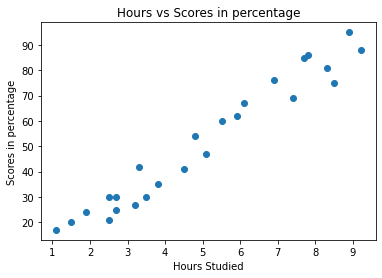

In [4]:
plt.scatter(x="Hours", y="Scores", data=scoredf)
plt.title("Hours vs Scores in percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores in percentage")

#### Based on the chart above, we observe that there is a strong linear positive relationship between scores in percentage and hours studied!

#### Prepare our data for linear regression

In [5]:
#we want to split our data into x and y
X = scoredf.iloc[:,0].values
y = scoredf.iloc[:,-1].values

In [6]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### After obtaining our X and y, we want to build our regression model!

In [8]:
#split our data
from sklearn.model_selection import train_test_split

In [9]:
#we are going to split our data into 80% train ans 20% test!
#we want to do this because we are trying to acheive generalization

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [11]:
print(len(scoredf))
print(len(X_train))
print(len(X_test))

25
20
5


### We build our regression model now

In [12]:
from sklearn.linear_model import LinearRegression #Step 1: import of our model
regressor = LinearRegression() #step 2: instantiate our model
regressor.fit(X_train, y_train) #step 3: Train our model
print("Training is complete!")

Training is complete!


#### Remember we are looking for : y = MX + b

In [13]:
#slope
regressor.coef_

array([[9.68207815]])

In [14]:
#y intercept - B
regressor.intercept_

array([2.82689235])

### Now we visualise our regression model!

In [15]:
#y = mx + b
line = regressor.coef_*X + regressor.intercept_
#this is our straight line equation

In [16]:
line[0]

array([27.03208774, 52.20549094, 33.80954245, 85.12455667, 36.71416589,
       17.35000959, 91.90201137, 56.0783222 , 83.18814104, 28.96850337,
       77.37889414, 59.95115347, 46.39624405, 34.77775026, 13.47717832,
       88.99738793, 27.03208774, 21.22284085, 61.8875691 , 74.4742707 ,
       28.96850337, 49.3008675 , 39.61878934, 69.63323162, 78.34710196])

Text(0, 0.5, 'Scores in percentage')

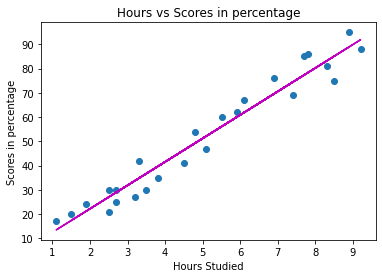

In [17]:
plt.scatter(X, y)
plt.plot(X,line[0],color='m')
plt.title("Hours vs Scores in percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores in percentage")

In [18]:
print("Hours Studied:")
print(X_test)

y_pred = regressor.predict(X_test)
print("Score you get [predicted]")
y_pred

Hours Studied:
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
Score you get [predicted]


array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

### Model Evaluation
This is the final step in our mode building journey - To see how well is our model doing?
We are going to make use of this thing Mean Absoloute Error metric

In [19]:
#Step 5: Evaluate your model

from sklearn.metrics import mean_absolute_error
print('MAE :', mean_absolute_error(y_test, y_pred))

MAE : 3.9207511902099244


You may want to "Show off model, by using your own values to predict!"

In [20]:
#testing with own data
hrs=[[20.6]] #number of hours i have studied
own_pred = regressor.predict(hrs)

print("My Hours studied", str(hrs))
print("Predicted score", str(own_pred))

My Hours studied [[20.6]]
Predicted score [[202.27770234]]


In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9684858031070392